In [2]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Reliance_Stock.csv to Reliance_Stock.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Reliance_Stock.csv']))

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,2015-06-09,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,2015-06-10,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,2015-06-11,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,2015-06-12,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [11]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,2015-06-09,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,2015-06-10,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,2015-06-11,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,2015-06-12,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2020-06-01,1480.0,1538.349976,1475.949951,1520.349976,1520.349976,18434012.0
1225,2020-06-02,1526.0,1540.000000,1520.800049,1535.699951,1535.699951,10224049.0
1226,2020-06-03,1545.0,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
1227,2020-06-04,1544.0,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
1228,2020-06-05,1595.0,1618.000000,1573.699951,1581.699951,1581.699951,15246965.0


In [14]:
df1=df.reset_index()['Close']
df1

0        442.725006
1        441.850006
2        452.899994
3        438.575012
4        444.924988
           ...     
1223    1520.349976
1224    1535.699951
1225    1541.650024
1226    1579.800049
1227    1581.699951
Name: Close, Length: 1228, dtype: float64

In [15]:
df1.shape

(1228,)

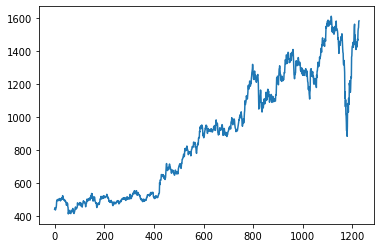

In [16]:
plt.plot(df1)

In [17]:
df1

0        442.725006
1        441.850006
2        452.899994
3        438.575012
4        444.924988
           ...     
1223    1520.349976
1224    1535.699951
1225    1541.650024
1226    1579.800049
1227    1581.699951
Name: Close, Length: 1228, dtype: float64

In [18]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(1228, 1)

In [21]:
df1

array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

In [22]:
training_size = int(len(df1) * 0.75)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [23]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 14s 434ms/step - loss: 0.0467 - val_loss: 0.0313
Epoch 2/100
13/13 [==============================] - 5s 363ms/step - loss: 0.0072 - val_loss: 0.0102
Epoch 3/100
13/13 [==============================] - 5s 361ms/step - loss: 0.0024 - val_loss: 0.0094
Epoch 4/100
13/13 [==============================] - 5s 365ms/step - loss: 0.0012 - val_loss: 0.0098
Epoch 5/100
13/13 [==============================] - 5s 367ms/step - loss: 0.0010 - val_loss: 0.0099
Epoch 6/100
13/13 [==============================] - 5s 365ms/step - loss: 9.6817e-04 - val_loss: 0.0097
Epoch 7/100
13/13 [==============================] - 5s 366ms/step - loss: 9.4542e-04 - val_loss: 0.0089
Epoch 8/100
13/13 [==============================] - 5s 367ms/step - loss: 9.2074e-04 - val_loss: 0.0090
Epoch 9/100
13/13 [==============================] - 5s 367ms/step - loss: 9.1566e-04 - val_loss: 0.0094
Epoch 10/100
13/13 [==============================] - 5s 368ms/step - loss

In [29]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [30]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [31]:
math.sqrt(mean_squared_error(y_train, train_predict))

808.6349424904485

In [32]:
math.sqrt(mean_squared_error(y_test, test_predict))

1358.3716760393768

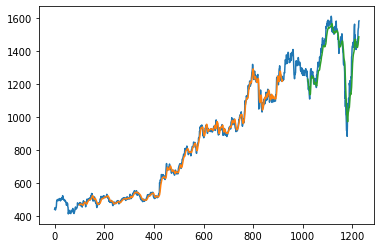

In [35]:

look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict


testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data), x_test.shape

(307, (206, 100, 1))

In [37]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [41]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.6620997  0.65042781 0.67368794 0.64791772 0.61503546 0.63026342
 0.67707661 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924
 0.84922714 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165
 0.86368529 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482
 0.85441462 0.87403524 0.85843081 0.83178201 0.85253205 0.85884916
 0.85073323 0.844458   0.862447   0.88478678 0.87821873 0.92503192
 0.9378752  0.94285362 0.97477365 0.97636329 0.92294759 0.92300206
 0.91843873 0.91281784 0.90700966 0.90184027 0.8972618  0.89316237
 0.88942462 0.88593906 0.88261062 0.87936276 0.87613803 0.87289691
 0.86961603 0.86628264 0.862894   0.85945386 0.85596907 0.85244828
 0.84890109 0.84533626 0.84176165 0.83818293 0.83460474 0.83103138
 0.82746339 0.8239035  0.82035112 0.81680614 0.81326813 0.80973619
 0.80620933 0.80268705 0.79916823 0.79565197 0.79213786 0.78862458
 0.78511173 0.78159845 0.7780844  0.7745685  0.77105016 0.76752949
 0.76400506 0.76047647 0.75694311 0.7534045  0.749

In [42]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.85073323 0.844458   0.862447   0.88478678 0.87821873 0.92503192
 0.9378752  0.94285362 0.97477365 0.97636329 0.92294759 0.92300206
 0.91843873 0.91281784 0.90700966 0.90184027 0.8972618  0.89316237
 0.88942462 0.88593906 0.88261062 0.87936276 0.87613803 0.87289691
 0.86961603 0.86628264 0.862894   0.85945386 0.85596907 0.85244828
 0.84890109 0.84533626 0.84176165 0.83818293 0.83460474 0.83103138
 0.82746339 0.8239035  0.82035112 0.81680614 0.81326813 0.80973619
 0.80620933 0.80268705 0.79916823 0.79565197 0.79213786 0.78862458
 0.78511173 0.78159845 0.7780844  0.7745685  0.77105016 0.76752949
 0.76400506 0.76047647 0.75694311 0.7534045  0.74985975 0.74630839
 0.74274945 0.73918259 0.73560685 0.73202181 0.7284264  0.72482055
 0.72120291 0.71757305 0.71387601 0.70963222 0.70542622 0.70127529
 0.6971857  0.6931687  0.68923259 0.68537909 0.68160468 0.67790204
 0.67426217 0.67067426 0.66712904 0.66361707 0.66013068 0.65666395
 0.65321231 0.6497727  0.64634287 0.64292192 0.639

In [43]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [45]:
df2 = df1.tolist()
df2.extend(lst_output)

In [46]:
len(df1)

1228

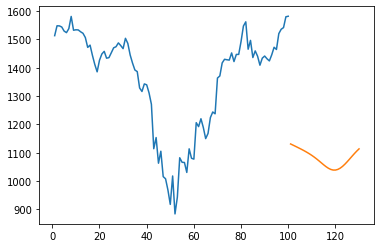

In [47]:
plt.plot(day_new, scaler.inverse_transform(df1[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

In [48]:
df2=scaler.inverse_transform(df2).tolist()

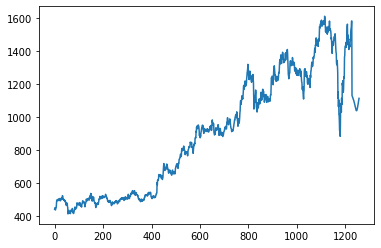

In [49]:
plt.plot(df2)